In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt
import os
from binance.client import Client
from keys import keys
from functions import get_candles
import seaborn as sns
# from datetime import timedelta, datetime
# from dateutil import parser
# from bitmex import bitmex
# from keys import keys
# from tqdm import tqdm

binance_client = Client(api_key=keys['binance']['apiKey'], api_secret=keys['binance']['secret'])

In [3]:
info = binance_client.futures_exchange_info()

In [4]:
tickers = binance_client.futures_ticker()

In [19]:
vol = pd.DataFrame([(t['symbol'], float(t['volume']), float(t['weightedAvgPrice'])) for t in tickers],
                   columns=['symbol', 'volume', 'price'])
vol['nominal_volume'] = vol.volume * vol.price
vol = vol.sort_values('nominal_volume', ascending=False)
print(vol.head(10))
symbols = vol.symbol.values

       symbol          volume       price   nominal_volume
0     BTCUSDT    205412.12200 10752.11000 2208613731.07742
1     ETHUSDT   1558478.76200   343.48000  535306285.17176
42    YFIUSDT     26434.25700 14491.40000  383069391.88980
8    LINKUSDT  28794678.09000     9.05500  260735810.10495
56    UNIUSDT  77555693.00000     3.05050  236583641.49650
46   YFIIUSDT    119893.89700  1522.10000  182490500.62370
48  SUSHIUSDT 161200208.00000     0.69790  112501625.16320
2     BCHUSDT    363643.96800   229.10000   83310833.06880
40    DOTUSDT  18892297.90000     3.86800   73075408.27720
3     XRPUSDT 244714500.70000     0.24790   60664724.72353


In [20]:
future_files = [x for x in os.listdir('data/candles') if 'futures' in x]

In [28]:
freq='H'
min_length = 4000 * 60 # In minutes
files = os.listdir('data/candles')

df = pd.DataFrame()
for symbol in symbols:
    file = 'data/candles/' + symbol + '-1m-futures-data.csv.zip'
    if symbol + '-1m-futures-data.csv.zip' in files:
        data = pd.read_csv(file)
        if len(data) < min_length:
            continue
        data['timestamp'] = pd.to_datetime(data.timestamp, format='%Y-%m-%d %H:%M:%S')
        data.set_index('timestamp', inplace=True)
        data = get_candles(data, freq)   
        df[symbol] = data.close
    
symbols = df.columns

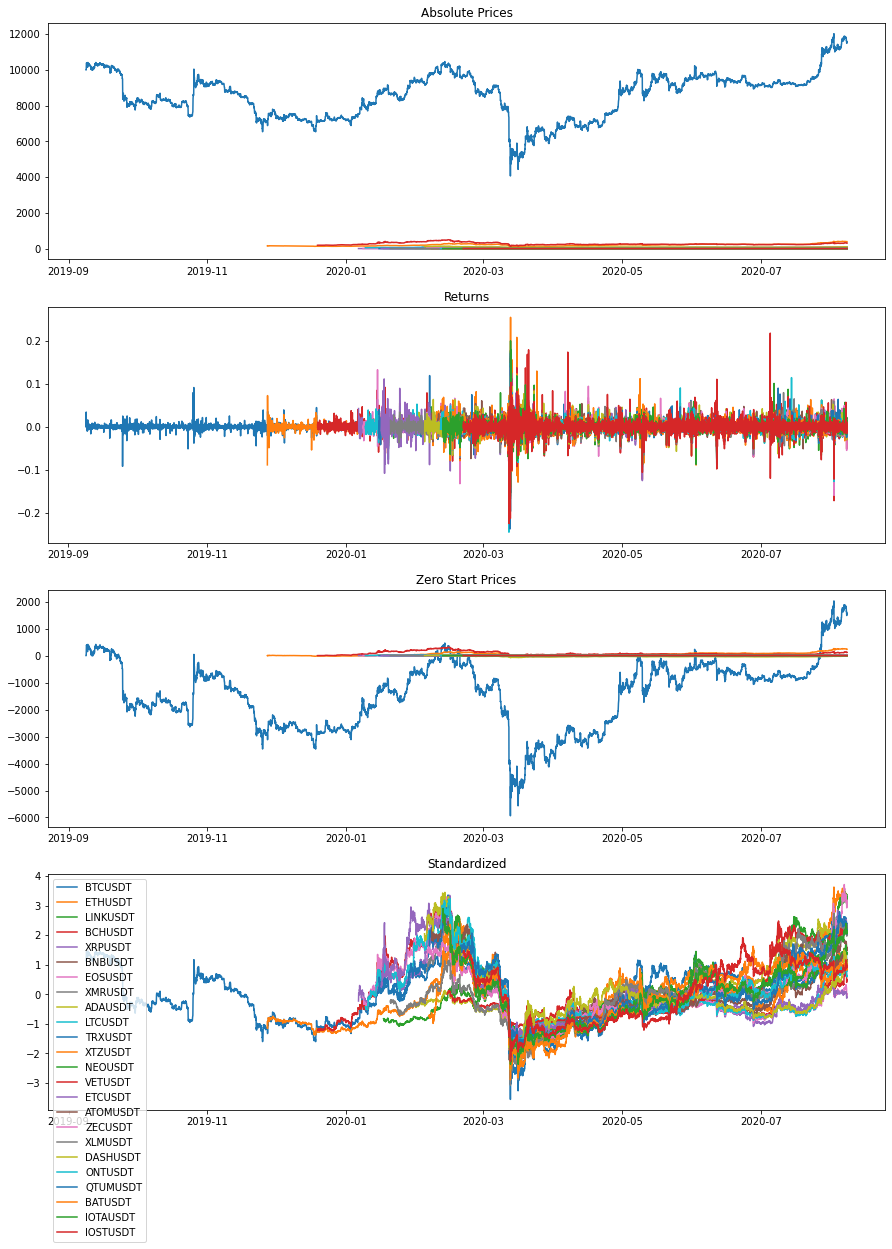

In [26]:
fig, (ax0,ax1,ax2, ax3) = plt.subplots(4,1, figsize=(15,20))
for symbol in symbols:
    ax0.plot(df[symbol], label=symbol)
    ax1.plot(df[symbol].pct_change(), label=symbol)
    ax2.plot(df[symbol].dropna() - df[symbol].dropna().values[0], label=symbol)
    ax3.plot((df[symbol]- df[symbol].mean())/df[symbol].std(), label=symbol)
ax0.set_title('Absolute Prices')
ax1.set_title('Returns')
ax2.set_title('Zero Start Prices')
ax3.set_title('Standardized')
ax3.legend()

In [ ]:
price_corr = df.corr()['BTCUSDT'].reset_index().sort_values('BTCUSDT', ascending=False)
price_corr.columns = ['symbol', 'correlation']
plt.figure(figsize=(15,5))
chart = sns.barplot(data=price_corr, x='symbol', y='correlation')
labels = chart.get_xticklabels()
chart.set_xticklabels(labels, rotation=45);
plt.title('Price Correlation');

In [ ]:
price_corr = df.pct_change().corr()['BTCUSDT'].reset_index().sort_values('BTCUSDT', ascending=False)
price_corr.columns = ['symbol', 'correlation']
plt.figure(figsize=(15,5))
chart = sns.barplot(data=price_corr, x='symbol', y='correlation')
labels = chart.get_xticklabels()
chart.set_xticklabels(labels, rotation=45);
plt.title('Returns Correlation');

In [27]:
df

,BTCUSDT,ETHUSDT,LINKUSDT,BCHUSDT,XRPUSDT,BNBUSDT,EOSUSDT,XMRUSDT,ADAUSDT,LTCUSDT,...,ETCUSDT,ATOMUSDT,ZECUSDT,XLMUSDT,DASHUSDT,ONTUSDT,QTUMUSDT,BATUSDT,IOTAUSDT,IOSTUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-09-08 17:00:00,10000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-09-08 18:00:00,10000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-09-08 19:00:00,10340.12000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-09-08 20:00:00,10351.42000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-09-08 21:00:00,10391.90000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07 17:00:00,11543.95000,373.83000,9.50000,295.27000,0.28950,21.89900,2.93800,92.28000,0.13747,57.09000,...,6.81800,3.98600,92.36000,0.10256,95.42000,0.69680,2.61700,0.25120,0.31780,0.00581
2020-08-07 18:00:00,11486.16000,373.53000,9.54000,297.00000,0.28920,21.84100,2.95200,92.20000,0.13721,56.82000,...,6.82400,4.01200,90.88000,0.10199,95.03000,0.69700,2.59600,0.24990,0.31450,0.00575
2020-08-07 19:00:00,11494.28000,374.71000,9.74300,298.59000,0.28970,21.83400,2.97400,93.40000,0.13759,57.04000,...,6.83300,4.02600,91.48000,0.10221,95.79000,0.69580,2.61200,0.25090,0.31500,0.00581


In [63]:
file = 'data/candles/' + 'BTCUSDT' + '-1m-futures-data.csv.zip'
df = pd.read_csv(file)
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df.set_index('timestamp', inplace=True)
df = df[df.index>='2020-01-01 0:00:00']
df['dif'] = df.close.diff()

In [68]:
df.dif.sort_values().head()

timestamp
2020-05-10 00:20:00   -578.19000
2020-08-02 04:40:00   -456.40000
2020-08-02 04:38:00   -441.66000
2020-06-02 14:46:00   -361.86000
2020-03-13 02:40:00   -357.40000
Name: dif, dtype: float64

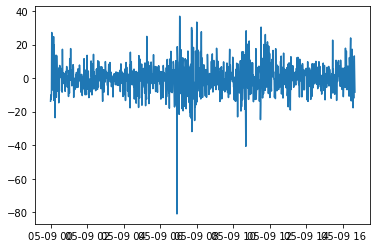

In [81]:
plt.plot(df[df.index>='2020-05-9 00:00:00'].dif[0:1000])

In [62]:
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,dif
timestamp,,,,,,,,,,,,
2019-09-08 17:57:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00100,1567965479999,10.00000,1,0.00000,0.00000,0,nan
2019-09-08 17:58:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00000,1567965539999,0.00000,0,0.00000,0.00000,0,0.00000
2019-09-08 17:59:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00100,1567965599999,10.00000,1,0.00100,10.00000,0,0.00000
2019-09-08 18:00:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00000,1567965659999,0.00000,0,0.00000,0.00000,0,0.00000
2019-09-08 18:01:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00000,1567965719999,0.00000,0,0.00000,0.00000,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07 21:05:00,11575.10000,11575.10000,11566.10000,11566.10000,55.00700,1596834359999,636541.84336,285,6.42200,74328.33077,0,-9.00000
2020-08-07 21:06:00,11566.44000,11568.01000,11564.52000,11568.01000,67.39700,1596834419999,779522.64797,296,43.84800,507163.95107,0,1.91000
2020-08-07 21:07:00,11568.00000,11575.00000,11568.00000,11574.87000,47.22400,1596834479999,546465.11610,281,43.83300,507227.47585,0,6.86000


In [61]:
df[df.index>='2019-09-01 0:00:00']

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,dif
timestamp,,,,,,,,,,,,
2019-09-08 17:57:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00100,1567965479999,10.00000,1,0.00000,0.00000,0,nan
2019-09-08 17:58:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00000,1567965539999,0.00000,0,0.00000,0.00000,0,0.00000
2019-09-08 17:59:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00100,1567965599999,10.00000,1,0.00100,10.00000,0,0.00000
2019-09-08 18:00:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00000,1567965659999,0.00000,0,0.00000,0.00000,0,0.00000
2019-09-08 18:01:00,10000.00000,10000.00000,10000.00000,10000.00000,0.00000,1567965719999,0.00000,0,0.00000,0.00000,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07 21:05:00,11575.10000,11575.10000,11566.10000,11566.10000,55.00700,1596834359999,636541.84336,285,6.42200,74328.33077,0,-9.00000
2020-08-07 21:06:00,11566.44000,11568.01000,11564.52000,11568.01000,67.39700,1596834419999,779522.64797,296,43.84800,507163.95107,0,1.91000
2020-08-07 21:07:00,11568.00000,11575.00000,11568.00000,11574.87000,47.22400,1596834479999,546465.11610,281,43.83300,507227.47585,0,6.86000


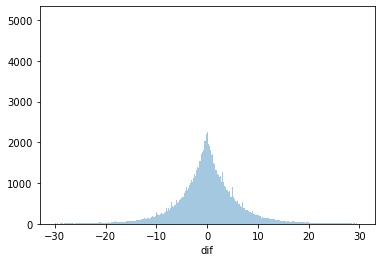

In [87]:
sns.distplot(df[(30>df.dif)&(df.dif>-30)].dif, kde=False, bins=1000)

In [151]:
price_corr = df.pct_change().std().reset_index().sort_values('BTCUSDT', ascending=False)
price_corr.columns = ['symbol', 'correlation']
plt.figure(figsize=(15,5))
chart = sns.barplot(data=price_corr, x='symbol', y='correlation')
labels = chart.get_xticklabels()
chart.set_xticklabels(labels, rotation=45);
plt.title('Returns Volatility');

AttributeError: 'numpy.float64' object has no attribute 'reset_index'